In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , StratifiedKFold
kfold = StratifiedKFold(n_splits=5)
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , plot_confusion_matrix , \
plot_precision_recall_curve, plot_roc_curve , roc_auc_score , recall_score

In [2]:
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler , LabelEncoder
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV , cross_val_score
from imblearn.over_sampling import SMOTE

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [4]:
df = pd.read_csv('processedheartdata.csv')
df.head()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,chest pain type,resting bp s,hypertension,...,resting heart rate,peak exercise bp 1,peak exercise bp 2,resting bp d,exercise angina,xhypo,oldpeak,ST height at rest,ST heaight at peak,target
0,1254,0,40,1,1,0,0.0,2,140.0,0.0,...,86.0,200.0,110.0,86.0,0.0,0.0,0.0,26.0,20.0,0
1,1255,0,49,0,1,0,0.0,3,160.0,1.0,...,100.0,220.0,106.0,90.0,0.0,0.0,1.0,14.0,13.0,1
2,1256,0,37,1,1,0,0.0,2,130.0,0.0,...,58.0,180.0,100.0,80.0,0.0,0.0,0.0,17.0,14.0,0
3,1257,0,48,0,1,1,1.0,4,138.0,0.0,...,54.0,210.0,106.0,86.0,1.0,0.0,1.5,19.0,22.0,3
4,1258,0,54,1,1,0,1.0,3,150.0,0.0,...,74.0,130.0,100.0,90.0,0.0,1.0,0.0,13.0,9.0,0


In [5]:
df.shape

(617, 32)

In [6]:
df.columns

Index(['_id', 'ccf', 'age', 'sex', 'pain location', 'pain w exertion',
       'relieved after rest', 'chest pain type', 'resting bp s',
       'hypertension', 'cholesterol', 'fasting blood sugar', 'resting ecg',
       'digitalis', 'beta blocker', 'nitrates', 'calcium channel blocker',
       'diuretic', 'exercise protocol', 'duration of exercise',
       'mets achieved', 'max heart rate', 'resting heart rate',
       'peak exercise bp 1', 'peak exercise bp 2', 'resting bp d',
       'exercise angina', 'xhypo', 'oldpeak', 'ST height at rest',
       'ST heaight at peak', 'target'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      617 non-null    int64  
 1   ccf                      617 non-null    int64  
 2   age                      617 non-null    int64  
 3   sex                      617 non-null    int64  
 4   pain location            617 non-null    int64  
 5   pain w exertion          617 non-null    int64  
 6   relieved after rest      617 non-null    float64
 7   chest pain type          617 non-null    int64  
 8   resting bp s             617 non-null    float64
 9   hypertension             617 non-null    float64
 10  cholesterol              617 non-null    float64
 11  fasting blood sugar      617 non-null    float64
 12  resting ecg              617 non-null    float64
 13  digitalis                617 non-null    float64
 14  beta blocker             6

In [8]:
cols = ['ccf','fasting blood sugar','resting ecg','digitalis','beta blocker','nitrates','calcium channel blocker','diuretic',
       'exercise protocol','mets achieved','peak exercise bp 1', 'peak exercise bp 2','resting bp d','exercise angina','xhypo',
       'oldpeak','ST height at rest','ST heaight at peak']
df.drop(cols, axis = 1, inplace = True)
df.shape

(617, 14)

In [9]:
df['target'].replace({2:1,3:1,4:1},inplace = True)

In [48]:
df.head()

,_id,age,sex,pain location,pain w exertion,relieved after rest,chest pain type,resting bp s,hypertension,cholesterol,duration of exercise,max heart rate,resting heart rate,target
0,1254,40,1,1,0,0.0,2,140.0,0.0,289.000000,18.0,172.0,86.0,0
1,1255,49,0,1,0,0.0,3,160.0,1.0,180.000000,10.0,156.0,100.0,1
2,1256,37,1,1,0,0.0,2,130.0,0.0,283.000000,10.0,98.0,58.0,0
3,1257,48,0,1,1,1.0,4,138.0,0.0,214.000000,5.0,108.0,54.0,1
4,1258,54,1,1,0,1.0,3,150.0,0.0,174.579216,2.0,122.0,74.0,0


In [10]:
balance = df.target.value_counts()
balance

1    370
0    247
Name: target, dtype: int64

Text(0.5, 1.0, 'Value counts of target')

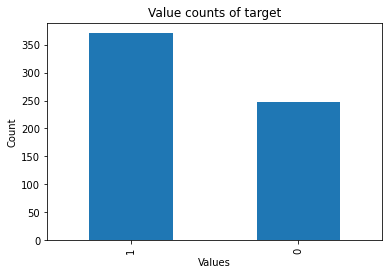

In [11]:
balance.plot(kind = 'bar')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value counts of target')

In [12]:
smote = SMOTE(random_state= 42)

In [13]:
X,y = smote.fit_resample(df.drop(['target','_id'],axis = 1) , df['target'].ravel())

1    0.5
0    0.5
Name: Target, dtype: float64


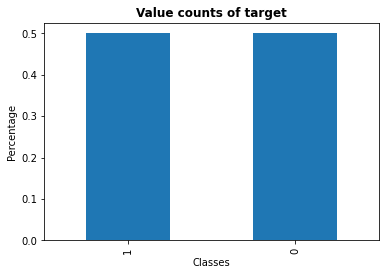

In [14]:
# Check target classes balance
df2 = pd.DataFrame(y , columns= ['Target'])
cla_bal = df2['Target'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Value counts of target',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size= 0.20 , random_state= 42)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((592, 12), (592,), (148, 12), (148,))

In [16]:
columns = ['age', 'resting bp s','cholesterol' , 'duration of exercise','max heart rate','resting heart rate']
scaler = RobustScaler()

for column in columns:
    X[column] = scaler.fit_transform(X[column].values.reshape(-1,1))

# 1. Logistic Regression

In [17]:
clf_lr = LogisticRegression(random_state= 42)

In [18]:
# clf_lr.fit(X_train , y_train)
# scores = cross_val_score(clf_lr , X_test , y_test , scoring= "accuracy")
# accuracy_lr = np.mean(scores)
# y_pred_test = clf_lr.predict(X_test)
# recall_lr = recall_score(y_test, y_pred_test, average='weighted')

In [19]:
# Creating a dataframe to keep record of auc scores
model = []
auc = []
def performance(new_model , new_score):
    model.append(new_model)
    auc.append(new_score)
    score_df = pd.DataFrame(zip(model , auc) , columns = ['Model', 'ROC_AUC'], index = None)
    #print(score_df)
    return score_df

In [20]:
# Define a function to compute Precision, Recall and F1 score
model_name = []
precision_list = []
recall_list = []
F1_list = []
def get_pre_rec_f1(model , new_model_name):

    if new_model_name == 'Artificial Neural Network':
        model_name.append(new_model_name)
        proba = model.predict_proba(X_test)
        y_pred_ann = (proba > 0.5)
        roc_auc_ann = roc_auc_score(y_test, y_pred_ann)
        tp, fp, fn, tn = confusion_matrix(y_test, y_pred_ann).ravel()
        precision = tp / (tp + fp)
        precision_list.append(precision)
        recall = tp / (tp + fn)
        recall_list.append(recall)
        F1 = (2 * precision * recall) / (precision + recall)
        F1_list.append(F1)
        evaluation_df = pd.DataFrame(zip(model_name , precision_list , recall_list , F1_list) , columns = \
                                 ['Model','Precision', 'Recall', 'F1_Score'])
        #print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')
        return evaluation_df
    else: 
        model_name.append(new_model_name)
        y_pred = model.predict(X_test)
        tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
        precision = tp / (tp + fp)
        precision_list.append(precision)
        recall = tp / (tp + fn)
        recall_list.append(recall)
        F1 = (2 * precision * recall) / (precision + recall)
        F1_list.append(F1)
        evaluation_df = pd.DataFrame(zip(model_name , precision_list , recall_list , F1_list) , columns = \
                                 ['Model','Precision', 'Recall', 'F1_Score'])
        #print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')
        return evaluation_df

In [21]:
# performance('Logistic Regression',accuracy_lr , recall_lr)

# 2. Random Forest

In [22]:
# # Hyperparameter tuning

# # Create parameter grid  
# param_grid = {
#     'max_depth': [60, 90, 110],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300]
# }

# Instantiate the model
clf_rf = RandomForestClassifier()

# # Instantiate grid search model
# grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
#                           cv = 3, n_jobs = -1, verbose = 1)

# # Fit grid search to the data
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [23]:
# # Use the best parameters to fit the model

# clf_rf = RandomForestClassifier(**grid_search.best_params_)   
# clf_rf.fit(X_train,y_train)

# scores = cross_val_score(clf_rf, X_test, y_test, scoring ="accuracy", cv = 5)
# accuracy_rf = np.mean(scores)
# y_pred_test = clf_rf.predict(X_test)
# recall_rf = recall_score(y_test, y_pred_test, average='weighted')
# performance('Random Forest', accuracy_rf , recall_rf)

# 3. XGBoost

In [24]:
# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.4,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }

# Use randomized search to find best parameters

xgboost = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 5, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')


xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[16:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           verbosity=None),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7,

In [25]:
clf_xgb = XGBClassifier(**xgb_random.best_params_)   
clf_xgb.fit(X_train,y_train)

scores = cross_val_score(clf_xgb, X_test, y_test, scoring ="roc_auc", cv = 5)
roc_auc_xgb = np.mean(scores)
performance('XGBoost', roc_auc_xgb)
#print(roc_auc_xgb)

[16:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Model,ROC_AUC
0,XGBoost,0.848329


In [26]:
get_pre_rec_f1(clf_xgb,'XGBoost')

,Model,Precision,Recall,F1_Score
0,XGBoost,0.680556,0.844828,0.753846


# 4. Kernelized SVM

In [27]:
clf_svm = SVC()

In [28]:
# param_grid_svm = {'C': [0.01,0.1,1],\
#               'gamma': [0.01,0.1,1],\
#               'kernel': ['poly', 'rbf', 'sigmoid']}
# svm_random = RandomizedSearchCV(estimator = clf_svm, 
#                                 param_distributions = param_grid_svm, 
#                                 n_iter = 5, 
#                                 cv = 3, 
#                                 verbose=1, 
#                                 random_state=42, 
#                                 n_jobs = -1,
#                                 scoring ='accuracy')
# svm_random.fit(X_train , y_train)
# clf_svm = SVC(**svm_random.best_params_)
# clf_svm.fit(X_train , y_train)
# scores = cross_val_score(clf_svm , X_test , y_test , scoring="roc_auc", cv = 5)
# roc_auc_svm = np.mean(scores)
# performance('Support Vector Machine',roc_auc)

In [29]:
# get_pre_rec_f1(clf_svm,'Support Vector Machines')

# 5. KNN Classification

In [30]:
# Hyperparameter tuning

clf_knn = KNeighborsClassifier()

# param_grid_knn = {'n_neighbors' : [1,2,3,4,5,7,10]}

# knn_random = RandomizedSearchCV(estimator = clf_knn, 
#                                 param_distributions = param_grid_knn, 
#                                 n_iter = 5, 
#                                 cv = 3, 
#                                 verbose=1, 
#                                 random_state=42, 
#                                 n_jobs = -1,
#                                 scoring ='roc_auc')

# knn_random.fit(X_train, y_train)

In [31]:
# clf_knn = KNeighborsClassifier(**knn_random.best_params_)
# clf_knn.fit(X_train , y_train)
# scores = cross_val_score(clf_knn , X_test , y_test , scoring="accuracy", cv = 5)
# accuracy_knn = np.mean(scores)
# y_pred_test = clf_knn.predict(X_test)
# recall_knn = recall_score(y_test, y_pred_test, average='weighted')
# performance('K Nearest Neighbours',accuracy_knn, recall_knn)

# 6. Naive Bayes

In [32]:
clf_gnb = GaussianNB()
# clf_gnb.fit(X_train,y_train)
# scores = cross_val_score(clf_gnb , X_test , y_test, scoring = 'accuracy', cv = kfold)
# accuracy_gnb = np.mean(scores)
# y_pred_test = clf_gnb.predict(X_test)
# recall_gnb = recall_score(y_test , y_pred_test , average = 'weighted')
# performance('Naive Bayes', accuracy_gnb, recall_gnb)

# 7. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
# param_grid_dt = {'max_depth': [2, 3, 4, 5,6, 10, 20]}

# grid_search_dt = GridSearchCV(clf_dt, param_grid_dt, scoring = 'roc_auc',cv=kfold, return_train_score=True, verbose= 1 , n_jobs=-1)
# grid_search_dt.fit(X_train,y_train)
# clf_dt = DecisionTreeClassifier(**grid_search_dt.best_params_)
# clf_dt.fit(X_train,y_train)
# scores = cross_val_score(clf_dt , X_test , y_test , scoring = 'accuracy', cv = kfold)
# accuracy_dt = np.mean(scores)
# y_pred_test = clf_dt.predict(X_test)
# recall_dt = recall_score(y_test , y_pred_test , average = 'weighted')
# performance('Decision Tree', accuracy_dt, recall_dt)

# 8. Voting Classifier

In [34]:
# from sklearn.ensemble import VotingClassifier

# hard_voting_clf = VotingClassifier(estimators=[('knn', clf_knn),('lr',clf_lr),('svm', clf_svm),
#                                    ('dt', clf_dt), ('rf', clf_rf) , ('xgb', clf_xgb)],voting = 'hard')
# hard_voting_clf.fit(X_train, y_train)
# accuracy_vclf = hard_voting_clf.score(X_test , y_test)
# scores = cross_val_score(estimator = hard_voting_clf,X=X_test,y=y_test, scoring='roc_auc', cv=kfold)
# roc_auc_vclf = np.mean(scores)
# performance('Voting Classifier', roc_auc_vclf)
# get_pre_rec_f1(hard_voting_clf,'Voting Classifier')

# 9. Adaptive Boosting with Logistic Regression

In [35]:
# from sklearn.ensemble import AdaBoostClassifier

# adaboost_clf_lr = AdaBoostClassifier(base_estimator = clf_lr, learning_rate = 0.5)
# adaboost_clf_lr.fit(X_train, y_train)
# scores = cross_val_score(estimator= adaboost_clf_lr , X = X_test , y= y_test , scoring= 'accuracy' , cv =  kfold)
# accuracy_alr = np.mean(scores)
# scores = cross_val_score(estimator = adaboost_clf_lr ,X=X_test,y=y_test, scoring='recall_weighted', cv=kfold)
# recall_alr = np.mean(scores)
# performance('Adaboost Logistic Regression', accuracy_alr, recall_alr)

# 10. Adaptive Boosting with Random Forest

In [36]:
adaboost_clf_rf = AdaBoostClassifier(base_estimator = clf_rf, learning_rate = 0.5)
adaboost_clf_rf.fit(X_train, y_train)
scores = cross_val_score(estimator= adaboost_clf_rf , X = X_test , y= y_test , scoring= 'roc_auc' , cv =  kfold)
roc_auc_arf = np.mean(scores)
performance('Adaboost Random Forest', roc_auc_arf)

,Model,ROC_AUC
0,XGBoost,0.848329
1,Adaboost Random Forest,0.825351


In [37]:
get_pre_rec_f1(adaboost_clf_rf,'Adaboost Random Forest')

,Model,Precision,Recall,F1_Score
0,XGBoost,0.680556,0.844828,0.753846
1,Adaboost Random Forest,0.763889,0.797101,0.780142


# 11. Adaptive Boosting with XGBoost

In [38]:
# adaboost_clf_xgb = AdaBoostClassifier(base_estimator = clf_xgb, learning_rate = 0.5)
# adaboost_clf_xgb.fit(X_train, y_train)
# scores = cross_val_score(estimator= adaboost_clf_xgb , X = X_test , y= y_test , scoring= 'accuracy' , cv =  kfold)
# accuracy_axgb = np.mean(scores)
# scores = cross_val_score(estimator = adaboost_clf_xgb ,X=X_test,y=y_test, scoring='recall_weighted', cv=kfold)
# recall_axgb = np.mean(scores)
# performance('Adaboost XGBoost', accuracy_axgb, recall_axgb)

# 12. Adaptive Boosting with Kernelized SVM

In [39]:
# adaboost_clf_svm = AdaBoostClassifier(base_estimator = clf_svm, learning_rate = 0.5 , algorithm= 'SAMME')
# adaboost_clf_svm.fit(X_train, y_train)
# scores = cross_val_score(estimator= adaboost_clf_svm , X = X_test , y= y_test , scoring= 'accuracy' , cv =  kfold)
# accuracy_asvm = np.mean(scores)
# scores = cross_val_score(estimator = adaboost_clf_svm ,X=X_test,y=y_test, scoring='recall_weighted', cv=kfold)
# recall_asvm = np.mean(scores)
# performance('Adaboost SVM', accuracy_asvm, recall_asvm)

# 13. Adaptive Boosting with Decision Trees

In [40]:
# adaboost_clf_dt = AdaBoostClassifier(base_estimator = clf_dt, learning_rate = 0.5)
# adaboost_clf_dt.fit(X_train, y_train)
# scores = cross_val_score(estimator= adaboost_clf_dt , X = X_test , y= y_test , scoring= 'accuracy' , cv =  kfold)
# accuracy_adt = np.mean(scores)
# scores = cross_val_score(estimator = adaboost_clf_dt ,X=X_test,y=y_test, scoring='recall_weighted', cv=kfold)
# recall_adt = np.mean(scores)
# performance('Adaboost Decision Tree', accuracy_adt, recall_adt)

# 14. Adaptive Boosting with Naive Bayes

In [41]:
# adaboost_clf_gnb = AdaBoostClassifier(base_estimator = clf_gnb, learning_rate = 0.5)
# adaboost_clf_gnb.fit(X_train, y_train)
# scores = cross_val_score(estimator= adaboost_clf_gnb , X = X_test , y= y_test , scoring= 'accuracy' , cv =  kfold)
# accuracy_agnb = np.mean(scores)
# scores = cross_val_score(estimator = adaboost_clf_gnb ,X=X_test,y=y_test, scoring='recall_weighted', cv=kfold)
# recall_agnb = np.mean(scores)
# performance('Adaboost Naive Bayes', accuracy_agnb, recall_agnb)

# 15. Gradient Boosting Classifier

In [42]:
# from sklearn.ensemble import GradientBoostingClassifier

# clf_gb = GradientBoostingClassifier()
# param_grid_gb = {'learning_rate':[0.1 , 0.5 , 0.25] , 'n_estimators':[80,100,120,200] , 'min_samples_split':[1,2,4],
#                  'max_depth':[1,3,5]}
# grid_search_gb = GridSearchCV(clf_gb, param_grid_gb, scoring = 'accuracy',cv=kfold, return_train_score=True, verbose= 1 , n_jobs=-1)
# grid_search_gb.fit(X_train,y_train)
# clf_gb = GradientBoostingClassifier(**grid_search_gb.best_params_)
# clf_gb.fit(X_train, y_train)

In [43]:
# scores = cross_val_score(estimator= clf_gb , X = X_test , y= y_test , scoring= 'accuracy' , cv =  kfold)
# accuracy_gb = np.mean(scores)
# scores = cross_val_score(estimator = clf_gb ,X=X_test,y=y_test, scoring='recall_weighted', cv=kfold)
# recall_gb = np.mean(scores)
# performance('Gradient Boosting Classifier', accuracy_gb, recall_gb)

# 16. Light GBM Classifier

In [44]:
from lightgbm import LGBMClassifier
clf_lgbm = LGBMClassifier()
param_grid_lgbm = {'learning_rate':[0.1,0.2,0.5], 'max_depth':[-1,1,3],'n_estimator':[100,200,300]}
grid_search_lgbm = GridSearchCV(clf_lgbm, param_grid_lgbm, scoring = 'accuracy',cv=kfold, verbose= 1 , n_jobs=-1)
grid_search_lgbm.fit(X_train,y_train)
clf_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_)
clf_lgbm.fit(X_train , y_train)
scores = cross_val_score(estimator = clf_lgbm , X = X_test , y = y_test , scoring = 'roc_auc' , cv = kfold)
roc_auc_lgbm = np.mean(scores)
performance('Light GBM' , roc_auc_lgbm)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator


,Model,ROC_AUC
0,XGBoost,0.848329
1,Adaboost Random Forest,0.825351
2,Light GBM,0.798536


In [45]:
get_pre_rec_f1(clf_lgbm,'Light GBM')

,Model,Precision,Recall,F1_Score
0,XGBoost,0.680556,0.844828,0.753846
1,Adaboost Random Forest,0.763889,0.797101,0.780142
2,Light GBM,0.763889,0.808824,0.785714


# Experimental analysis

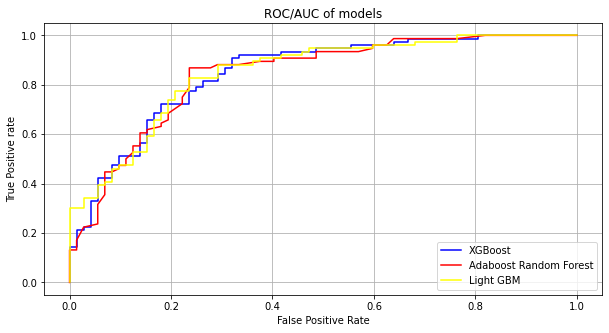

In [46]:
# Plot ROC_AUC curve of 4 models
 
fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(clf_xgb, X_test, y_test,ax=ax, color="blue",label='XGBoost')
#plot_roc_curve(clf_svm, X_test, y_test,ax=ax, color="black",label='Support Vector Machine')
plot_roc_curve(adaboost_clf_rf, X_test, y_test,ax=ax, color="red",label='Adaboost Random Forest')
plot_roc_curve(clf_lgbm , X_test , y_test , ax=ax , color = 'yellow' , label = 'Light GBM')
#plot_roc_curve(model , X_test , y_test , ax = ax , color = 'green' , label = 'ANN')

# # ROC_AUC curve for ANN
# proba = clf_ann.predict_proba(X_test)
# fpr1, tpr1, thresh1 = roc_curve(y_test, proba, pos_label=1)
# #plt.subplot(ax)
# plt.plot(fpr1, tpr1,color='green', label='ANN')
# # x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')
plt.title('ROC/AUC of models')
plt.grid()

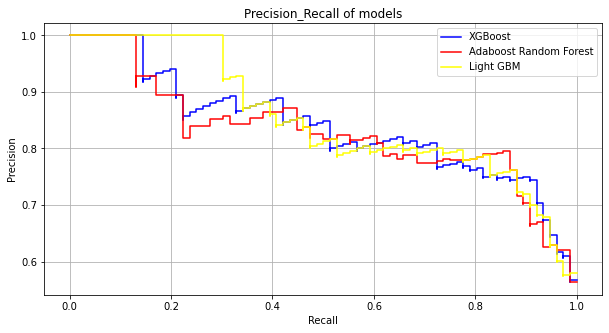

In [47]:
# Compare 3 models' Precision_recall curves

fig,ax=plt.subplots(figsize=(10,5))

plot_precision_recall_curve(clf_xgb, X_test, y_test,ax=ax, color="blue",label='XGBoost')
#plot_precision_recall_curve(clf_svm, X_test, y_test,ax=ax, color="black",label='Support Vector Machine')
plot_precision_recall_curve(adaboost_clf_rf, X_test, y_test,ax=ax, color="red",label='Adaboost Random Forest')
plot_precision_recall_curve(clf_lgbm , X_test , y_test , ax=ax , color = 'yellow' , label = 'Light GBM')

# Precision-Recall curve  for ANN
# proba = clf_ann.predict_proba(X_test)
# ann_precision, ann_recall, _ = precision_recall_curve(y_test, proba)
# ann_f1, ann_auc = 0.761693, 0.747971
# plt.plot(ann_recall, ann_precision, label='ANN' , color = 'green')



plt.title('Precision_Recall of models')
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()